In [ ]:
#------------------------------------------------------21/11/2018-------------------------------------------------------
# Física para Videojuegos- The version of the notebook server is: 5.6.0
# Cinemática - Entorno de Simulación - Python 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
# Orbitas Planetarias (MCU) - Parte 02/03
# Programmer: Carlos Prado
# Objetivo: Estudiar e implementar código,formulas matemáticas y leyes físicas para el estudio de orbitas Circulares y elipticas.
# Fuentes: https://www.fisicalab.com/apartado/gravedad-orbitas#contenidos
# http://www.labri.fr/perso/nrougier/coding/gallery/
#------------------------------------------------------------------------------------------------------------------------

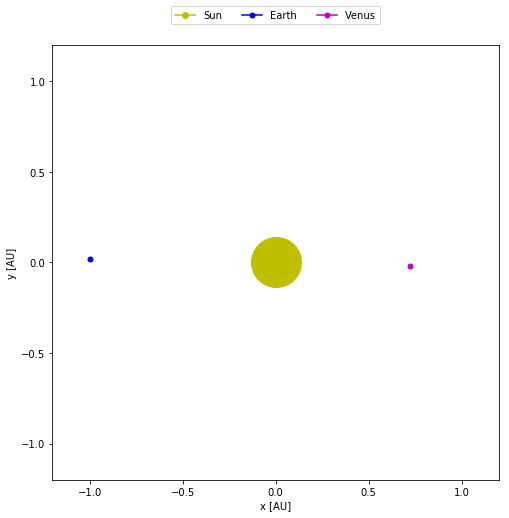

In [22]:
###########################################
# This code animates a N-body gravitational
# interaction between planets.

# Author: E. Paillas
# E-mail: epaillas@astro.puc.cl
# Website: www.enriquepaillas.com
###########################################

import numpy
import math
import pylab
import matplotlib.animation as animation
from matplotlib.font_manager import FontProperties

G = 6.67428e-11 # Newton's gravitational constant
AU = (149.6e6 * 1000) # Astronomical unit in metres
timestep = 24 * 3600 # One day in seconds (timestep for the simulation)

class planet(object):
    """
    Planet class.
    Contains information about the planet's
    current position, velocity and mass
    and other general information.
    """

    def __init__(self):
        self.px = 0.0
        self.py = 0.0
        self.vx = 0.0
        self.vy = 0.0
        self.mass = None
        self.color = None
        self.size = None
        self.name = None

    def compute_force(self, others):
        """
        Compute the total exerted force on the
        body at the current moment.
        """
        self.total_fx = self.total_fy = 0.0
        for other in others:
            # Compute the distance of the other body.
            sx, sy = self.px, self.py
            ox, oy = other.px, other.py
            dx = (ox-sx)
            dy = (oy-sy)
            d = numpy.sqrt(dx ** 2 + dy ** 2)

            # Compute the force of attraction
            f = G * self.mass * other.mass / (d ** 2)

            # Compute the direction of the force.
            theta = math.atan2(dy, dx)
            fx = math.cos(theta) * f
            fy = math.sin(theta) * f

            # Add to the total force exerted on the planet
            self.total_fx += fx
            self.total_fy += fy

    def update_position(self):
        """
        Update particle velocity and position based on the
        current exterted total force on the body.
        """
        self.vx += self.total_fx / self.mass * timestep
        self.vy += self.total_fy / self.mass * timestep
        self.px += self.vx * timestep
        self.py += self.vy * timestep

def animate(i, bodies, lines):
    """
    Animation function. Updates the
    plot on each interation.
    """
    for ind, body in enumerate(bodies):
        body.compute_force(numpy.delete(bodies, ind))
    for body in bodies:
        body.update_position()
    for i in range(len(bodies)):
        lines[i].set_data(bodies[i].px / AU, bodies[i].py / AU)
    return lines

def main():
    Sun = planet() # Instance of planet Sun
    Earth = planet() # Instance of planet Earth
    Venus = planet() # Instance of planet Venus

    Sun.mass = 1.98892 * 10 ** 30
    Sun.color = 'y'
    Sun.size = 50
    Sun.name = 'Sun'

    Earth.mass = 5.9742 * 10 ** 24
    Earth.px = -1 * AU
    Earth.vy = 29.783 * 1000
    Earth.color = 'b'
    Earth.size = 5
    Earth.name = 'Earth'

    Venus.mass = 4.8685 * 10 ** 24
    Venus.px = 0.723 * AU
    Venus.vy = -35.02 * 1000
    Venus.color = 'm'
    Venus.size = 5
    Venus.name = 'Venus'

    bodies = [Sun, Earth, Venus]
    lines = [None] * len(bodies)
    fig = pylab.figure(figsize=(8,8))
    ax = pylab.subplot()

    for i in range(len(bodies)):
        lines[i], = ax.plot(bodies[i].px / AU, bodies[i].py / AU,
        marker='o', color=bodies[i].color, ms=bodies[i].size,
        label=bodies[i].name)

    ani = animation.FuncAnimation(fig, animate, numpy.arange(1, 500),
        fargs=[bodies, lines], interval=20, blit=True, repeat=True)

    ax.set_xlabel('x [AU]')
    ax.set_ylabel('y [AU]')

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    legend = ax.legend(loc=9, bbox_to_anchor=(0.5, 1.1), ncol=3)
    legend.legendHandles[0]._legmarker.set_markersize(6)

    pylab.show()

if __name__ == "__main__":
    main()


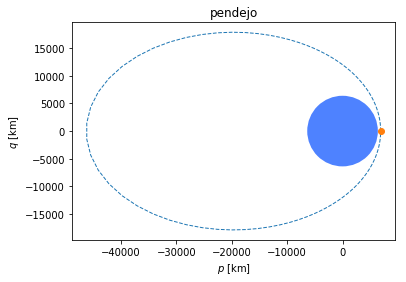

In [21]:
plot(molniya, title='pendejo', animate=True)